In [26]:
import sklearn
import pandas as pd
import random
from sklearn import datasets
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

## K-fold cross validation

In [27]:
data = pd.read_csv('mushroom.tsv', sep='\t')

In [28]:
#Create K folds
K = 5
number_of_entries = data.shape[0]
number_of_entries_edible = data[data['target'] == 0].shape[0]
number_of_entries_poisonous = data[data['target'] == 1].shape[0]

estrat = number_of_entries_poisonous / number_of_entries

instancias_por_fold = number_of_entries / K
instancias_por_fold_poison = math.floor(number_of_entries_poisonous / K)
instancias_por_fold_edible = math.floor(number_of_entries_edible / K)

fold_dataframes = []

for i in range(1,K):
    fold_df_poison = data[data['target'] == 1].sample(instancias_por_fold_poison)
    fold_df_edible = data[data['target'] == 0].sample(instancias_por_fold_edible)
    fold_df = pd.concat([fold_df_poison, fold_df_edible])
    data = data.drop(fold_df.index)
    fold_dataframes.append(fold_df)
    
fold_dataframes.append(data)

In [29]:
a = pd.concat(fold_dataframes)

In [30]:
display(fold_dataframes[0].index)

Int64Index([5890, 3331, 4755, 4790,  394, 7714, 3037, 2715,  775, 1337,
            ...
            6412, 5124,  409,  352, 1838, 3043, 3286, 7397, 1027, 4946],
           dtype='int64', length=1624)

### Train KNN

[826, 8, 775, 15]

[831, 8, 775, 10]

[831, 4, 779, 10]

[827, 8, 775, 14]

[837, 12, 772, 7]

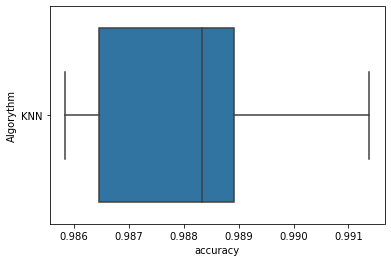

In [58]:
KNN = KNeighborsClassifier(n_neighbors=51)
KNN_metrics = []
KKN_metrics_calculated = []

for i in range(0, K):
    train_data = {}

    #Cria dataset com todos os folds menos o i-ésimo, que será usado para teste
    train_data = pd.concat(fold_dataframes)
    train_data.drop(fold_dataframes[i].index)

    #Pega dados de teste, remove a coluna target
    features = train_data.columns[1:-1]
    X = train_data.loc[:, features]
    y = train_data.target

    #Faz o fitting do algoritmo
    KNN.fit(X, y)

    #Testa com dados de teste
    test_data = fold_dataframes[i].loc[:, features]
    predictions = KNN.predict(test_data)
    truth_val = fold_dataframes[i].loc[:, 'target'].tolist()

    vp = 0
    fp = 0
    vn = 0
    fn = 0
    #Contabiliza verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos
    for j in range(0, test_data.shape[0]):
        if predictions[j] == 0 and predictions[j] == truth_val[j]:
            vp += 1
        elif predictions[j] == 0 and predictions[j] != truth_val[j]:
            fp += 1
        elif predictions[j] == 1 and predictions[j] == truth_val[j]:
            vn += 1
        else:
            fn += 1

    results = [vp, fp, vn, fn]
    KNN_metric = {}
    KNN_metric["acc"] = (vp + vn) / (vp + vn + fp + fn)
    KNN_metric["sens"] = (vp) / (vp + fn)
    KNN_metric["prec"] = (vp) / (vp+fp)
    
    β = 0.5
    KNN_metric["f1"] = (1+β*β)*KNN_metric["prec"]*KNN_metric["sens"]/(β*β * KNN_metric["prec"] + KNN_metric["sens"])
    
    KKN_metrics_calculated.append(KNN_metric)
    display(results)
    KNN_metrics.append(results)


import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

knn_accuracies = []
knn_name = []
for result in KKN_metrics_calculated:
    knn_accuracies.append(result["acc"])
    knn_name.append('KNN')

knn_accuracy_data = {'Algorythm':knn_name,'accuracy':knn_accuracies}
df = pd.DataFrame(knn_accuracy_data)
sbs.boxplot(y=(df["Algorythm"]), x=(df["accuracy"]))
plt.show()

In [33]:
KKN_metrics_calculated

[{'acc': 0.9858374384236454,
  'sens': 0.9821640903686087,
  'prec': 0.9904076738609112,
  'f1': 0.988747905195116},
 {'acc': 0.9889162561576355,
  'sens': 0.9881093935790726,
  'prec': 0.9904648390941597,
  'f1': 0.9899928520371695},
 {'acc': 0.9913793103448276,
  'sens': 0.9881093935790726,
  'prec': 0.9952095808383233,
  'f1': 0.9937813920114805},
 {'acc': 0.9864532019704434,
  'sens': 0.9833531510107015,
  'prec': 0.9904191616766467,
  'f1': 0.9889978474049269},
 {'acc': 0.9883292383292384,
  'sens': 0.9917061611374408,
  'prec': 0.9858657243816255,
  'f1': 0.9870283018867924}]

### Train Randomized Forest

[841, 0, 783, 0]

[841, 0, 783, 0]

[841, 0, 783, 0]

[841, 0, 783, 0]

[844, 0, 784, 0]

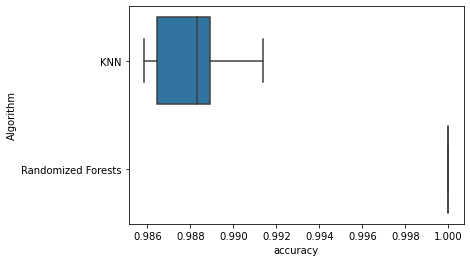

In [59]:
RFC = RandomForestClassifier(max_depth=10, random_state=0)
RFC_metrics = []
RFC_metrics_calculated = []

for i in range(0, K):
    train_data = {}

    #Cria dataset com todos os folds menos o i-ésimo, que será usado para teste
    train_data = pd.concat(fold_dataframes)
    train_data.drop(fold_dataframes[i].index)

    #Pega dados de teste, remove a coluna target
    features = train_data.columns[1:-1]
    X = train_data.loc[:, features]
    y = train_data.target

    #Faz o fitting do algoritmo
    RFC.fit(X, y)

    #Testa com dados de teste
    test_data = fold_dataframes[i].loc[:, features]
    predictions = RFC.predict(test_data)
    truth_val = fold_dataframes[i].loc[:, 'target'].tolist()

    vp = 0
    fp = 0
    vn = 0
    fn = 0
    #Contabiliza verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos
    for j in range(0, test_data.shape[0]):
        if predictions[j] == 0 and predictions[j] == truth_val[j]:
            vp += 1
        elif predictions[j] == 0 and predictions[j] != truth_val[j]:
            fp += 1
        elif predictions[j] == 1 and predictions[j] == truth_val[j]:
            vn += 1
        else:
            fn += 1

    results = [vp, fp, vn, fn]
    RFC_metric = {}
    RFC_metric["acc"] = (vp + vn) / (vp + vn + fp + fn)
    RFC_metric["sens"] = (vp) / (vp + fn)
    RFC_metric["prec"] = (vp) / (vp+fp)
    
    β = 0.5
    RFC_metric["f1"] = (1+β*β)*RFC_metric["prec"]*RFC_metric["sens"]/(β*β * RFC_metric["prec"] + RFC_metric["sens"])
    RFC_metrics_calculated.append(RFC_metric)
    display(results)
    RFC_metrics.append(results)
    

In [35]:
RFC_metrics_calculated

[{'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0}]

### Train Linear Regression

[793, 63, 720, 48]

[791, 61, 722, 50]

[810, 65, 718, 31]

[798, 73, 710, 43]

[808, 69, 715, 36]

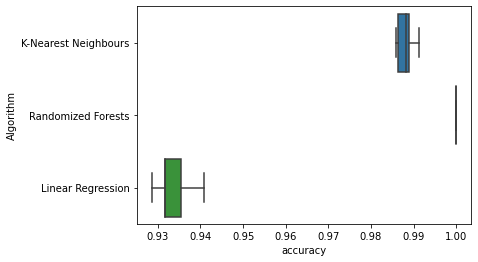

In [60]:

LR = LinearRegression()
LR_metrics = []
LR_metrics_calculated = []

for i in range(0, K):
    train_data = {}

    #Cria dataset com todos os folds menos o i-ésimo, que será usado para teste
    train_data = pd.concat(fold_dataframes)
    train_data.drop(fold_dataframes[i].index)

    #Pega dados de teste, remove a coluna target
    features = train_data.columns[1:-1]
    X = train_data.loc[:, features]
    y = train_data.target

    #Faz o fitting do algoritmo
    LR.fit(X, y)

    #Testa com dados de teste
    test_data = fold_dataframes[i].loc[:, features]
    predictions = LR.predict(test_data)
    truth_val = fold_dataframes[i].loc[:, 'target'].tolist()

    vp = 0
    fp = 0
    vn = 0
    fn = 0
    #Contabiliza verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos
    for j in range(0, test_data.shape[0]):
        if predictions[j] < 0.5 and 0 == truth_val[j]:
            vp += 1
        elif predictions[j] < 0.5 and 0 != truth_val[j]:
            fp += 1
        elif predictions[j] >= 0.5 and 1 == truth_val[j]:
            vn += 1
        else:
            fn += 1

    results = [vp, fp, vn, fn]
    LR_metric = {}
    LR_metric["acc"] = (vp + vn) / (vp + vn + fp + fn)
    LR_metric["sens"] = (vp) / (vp + fn)
    LR_metric["prec"] = (vp) / (vp+fp)
    
    β = 0.5
    LR_metric["f1"] = (1+β*β)*LR_metric["prec"]*LR_metric["sens"]/(β*β * LR_metric["prec"] + LR_metric["sens"])
    LR_metrics_calculated.append(LR_metric)
    display(results)
    LR_metrics.append(results)

### Generating Graphs For Analysis

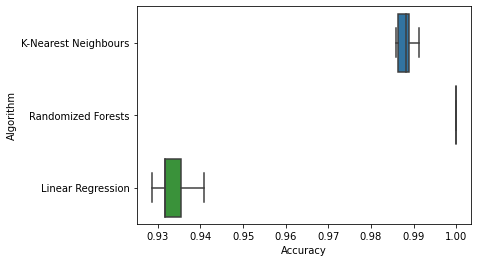

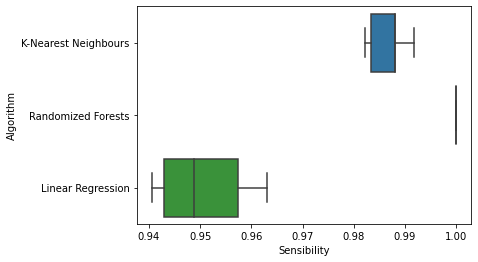

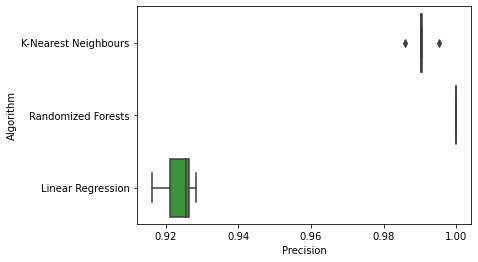

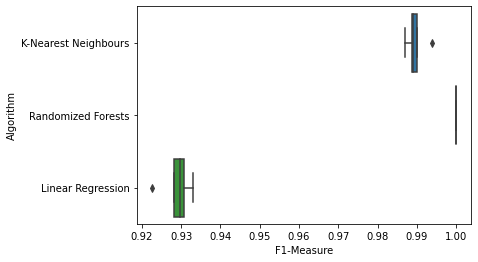

In [67]:
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

knn_accuracies = []
knn_sensibility = []
knn_precision = []
knn_f1Measure = []
knn_name = []
randomized_accuracies = []
randomized_sensibility = []
randomized_precision = []
randomized_name = []
randomized_f1Measure =[]
lr_accuracies = []
lr_sensibility = []
lr_precision=[]
lr_f1Measure=[]
lr_name = []

### Generating Dataset for Graphs and Tables

for result in KKN_metrics_calculated:
    knn_accuracies.append(result["acc"])
    knn_sensibility.append(result["sens"])
    knn_precision.append(result["prec"])
    knn_f1Measure.append(result["f1"])
    knn_name.append('K-Nearest Neighbours')

for result in RFC_metrics_calculated:
    randomized_accuracies.append(result["acc"])
    randomized_sensibility.append(result["sens"])
    randomized_precision.append(result["prec"])
    randomized_f1Measure.append(result["f1"])
    randomized_name.append('Randomized Forests')

for result in LR_metrics_calculated:
    lr_accuracies.append(result["acc"])
    lr_sensibility.append(result["sens"])
    lr_precision.append(result["prec"])
    lr_f1Measure.append(result["f1"])
    lr_name.append('Linear Regression')
    
algorithms_accuracy_data = {'Algorithm':knn_name+randomized_name+lr_name,'Accuracy':knn_accuracies+randomized_accuracies+lr_accuracies}
df = pd.DataFrame(algorithms_accuracy_data)
sbs.boxplot(y=(df["Algorithm"]), x=(df["Accuracy"]))
plt.show()

algorithms_sensibility_data = {'Algorithm':knn_name+randomized_name+lr_name,'Sensibility':knn_sensibility+randomized_sensibility+lr_sensibility}
df = pd.DataFrame(algorithms_sensibility_data)
sbs.boxplot(y=(df["Algorithm"]), x=(df["Sensibility"]))
plt.show()

algorithms_precision_data = {'Algorithm':knn_name+randomized_name+lr_name,'Precision':knn_precision+randomized_precision+lr_precision}
df = pd.DataFrame(algorithms_precision_data)
sbs.boxplot(y=(df["Algorithm"]), x=(df["Precision"]))
plt.show()

algorithms_f1_data = {'Algorithm':knn_name+randomized_name+lr_name,'F1-Measure':knn_f1Measure+randomized_f1Measure+lr_f1Measure}
df = pd.DataFrame(algorithms_f1_data)
sbs.boxplot(y=(df["Algorithm"]), x=(df["F1-Measure"]))
plt.show()

In [108]:
LR_metrics_calculated

[{'acc': 0.9285714285714286,
  'sens': 0.9536266349583828,
  'prec': 0.9124004550625711,
  'f1': 0.9203580445260499},
 {'acc': 0.9439655172413793,
  'sens': 0.9548156956004756,
  'prec': 0.9380841121495327,
  'f1': 0.9413833528722154},
 {'acc': 0.9279556650246306,
  'sens': 0.9346016646848989,
  'prec': 0.9268867924528302,
  'f1': 0.9284195605953226},
 {'acc': 0.9359605911330049,
  'sens': 0.9500594530321046,
  'prec': 0.9279907084785134,
  'f1': 0.9323220536756126},
 {'acc': 0.9318181818181818,
  'sens': 0.9597156398104265,
  'prec': 0.9131905298759865,
  'f1': 0.9221311475409835}]

## Testing basic functionalities of Python, SKLearn and Pandas

In [96]:
Encoder.fit(fold_dataframes[0])

OneHotEncoder(handle_unknown='ignore')

In [98]:
Encoder.categories_

[array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([0, 1, 2, 3], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1, 2, 3, 4], dtype=int64),
 array([0, 1, 2, 3], dtype=int64),
 array([0, 1, 2, 3], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([0], dtype=int64),
 array([0, 1, 2, 3], dtype=int64),
 array([0, 1, 2], dtype=int64),
 array([0, 1, 2, 3, 4], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([0, 1], dtype=int64)]

In [3]:
data

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,2,0,7,0,6,1,0,0,8,1,...,3,5,0,2,1,4,1,4,6,0
1,0,3,9,0,0,1,0,0,4,0,...,7,7,0,2,1,4,0,2,0,0
2,2,3,8,1,6,1,1,0,0,1,...,7,7,0,2,1,0,0,3,0,0
3,2,2,3,1,4,1,0,0,4,0,...,0,5,0,2,1,2,3,4,3,1
4,3,0,0,0,6,1,0,0,8,1,...,7,5,0,2,1,4,0,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,0,1,8,1,0,1,2,1,...,5,7,0,2,1,0,7,4,1,1
8120,3,2,8,0,7,1,0,1,0,0,...,7,7,0,2,1,4,0,3,4,1
8121,2,0,8,1,6,1,1,0,4,0,...,7,7,0,2,2,4,7,2,0,0
8122,2,3,8,1,6,1,1,0,4,0,...,7,7,0,2,2,4,7,3,0,0


In [28]:
data.sample(10).target

2950    0
4817    1
6910    0
2580    0
6968    0
7251    1
6071    1
6680    1
430     1
4449    0
Name: target, dtype: int64

In [7]:
new_df = data[data['target'] == 0].sample(frac=0.005)

In [8]:
new_df = data[data['target'] == 0].sample(frac=0.005)
new_df_2 = new_df.sample(n=11)
new_df = new_df.drop(new_df_2.index)

In [10]:
new_df_2.shape[0]

11

In [59]:
new_df_2

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
1725,2,2,9,0,0,1,0,0,4,0,...,7,7,0,2,1,4,0,2,2,0
3705,2,2,7,0,6,1,0,0,10,1,...,5,3,0,2,1,4,0,5,6,0
7180,2,2,8,0,1,1,0,0,4,0,...,7,7,0,2,1,4,0,2,0,0
624,2,2,0,0,6,1,0,0,8,1,...,7,5,0,2,1,4,0,4,6,0
840,2,3,8,0,1,1,0,0,4,0,...,7,7,0,2,1,4,0,3,0,0
1398,2,2,0,0,6,1,0,0,8,1,...,3,5,0,2,1,4,1,4,6,0
6412,3,2,0,0,1,1,0,0,10,0,...,7,7,0,2,1,4,1,3,3,0
7367,0,3,9,0,1,1,0,0,0,0,...,7,7,0,2,1,4,1,2,2,0
3840,0,3,8,0,0,1,0,0,4,0,...,7,7,0,2,1,4,1,2,0,0
186,4,0,3,1,6,1,1,0,10,0,...,7,7,0,2,2,4,7,2,0,0
